In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
# nation_position, club_position, player_positions
df = pd.read_csv('players_22.csv', low_memory=False)

In [3]:
# selecting column
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping NaN
df.dropna(inplace=True)

In [4]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']
# dropping injured players
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)



teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# filtering only national teams in the world cup
df = df[df['nationality_name'].isin(teams_worldcup)]

# best players
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

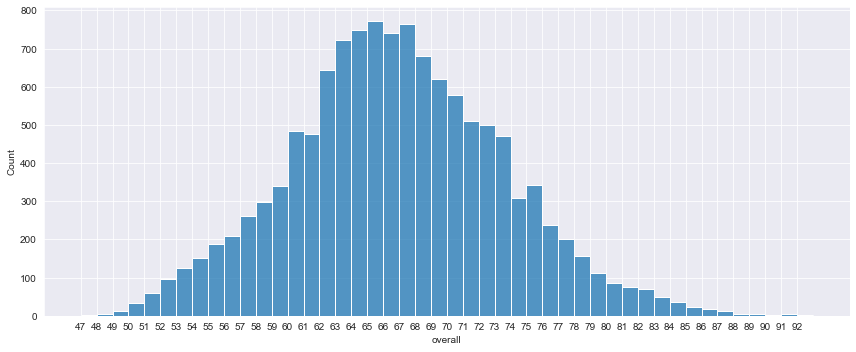

In [5]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

The plot is poisson distribution so we can use the prediction to be poisson function

In [6]:
df.drop_duplicates('player_positions')

df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

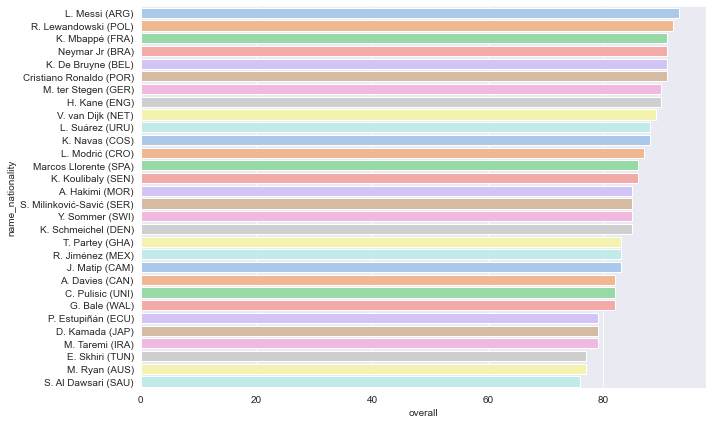

In [7]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(x=df_best_players['overall'], y=df_best_players['name_nationality'],
            palette=sns.color_palette('pastel'))
plt.show()

In [8]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [9]:
best_squad('Argentina')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
93,L. Martínez,23,Argentina,85,89,Inter,78000000.0,145000.0,ST
177,Á. Correa,26,Argentina,83,86,Atlético de Madrid,48000000.0,80000.0,ST
2913,N. Molina,23,Argentina,73,81,Udinese Calcio,6500000.0,11000.0,RWB
5437,E. Meza,22,Argentina,70,76,Club Atlético Colón,2400000.0,6000.0,RWB
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
33,Á. Di María,33,Argentina,87,87,Paris Saint-Germain,49500000.0,160000.0,RW
412,E. Salvio,30,Argentina,80,80,Boca Juniors,20500000.0,23000.0,RM
617,E. Buendía,24,Argentina,79,84,Aston Villa,26500000.0,61000.0,RM
818,G. Montiel,24,Argentina,78,84,Sevilla FC,21000000.0,23000.0,RB
1083,F. Bustos,25,Argentina,77,80,Club Atlético Independiente,13000000.0,14000.0,RB


In [10]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


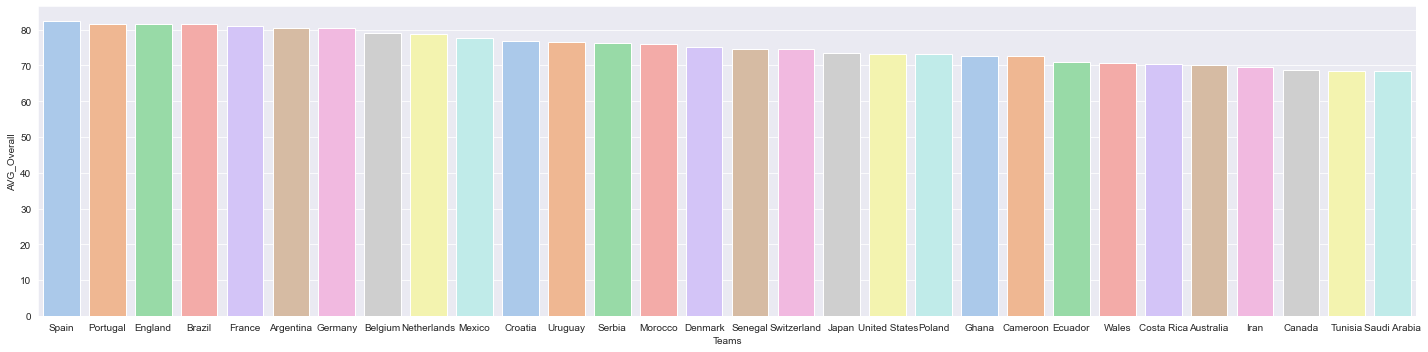

In [13]:
fig, ax = plt.subplots(figsize=(20, 5), tight_layout=True)
df_temp = df_average_overall[:32]
sns.barplot(x=df_temp['Teams'], y=df_temp['AVG_Overall'],
            palette=sns.color_palette('pastel'))
plt.show()

In [14]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [15]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}
# we can put more format

In [16]:
for index, row in df_average_overall[:9].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)


Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1
Belgium 4-3-3 82.54545454545455
Netherlands 4-4-2 82.54545454545455


In [17]:
# Now we get the popular team format and we will now feed this information 
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
0,L. Messi,93,Paris Saint-Germain,RW
818,G. Montiel,78,Sevilla FC,RB
171,L. Ocampos,83,Sevilla FC,LW
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
247,R. De Paul,82,Atlético de Madrid,CM
206,É. Banega,82,Al Shabab,CDM
69,A. Gómez,85,Sevilla FC,CAM
269,C. Romero,82,Tottenham Hotspur,CB
